In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns
sns.set()
%matplotlib inline

## Exploting the Data

In [2]:
raw_csv_data = pd.read_csv("Index2018.csv")

In [3]:
df_comp = raw_csv_data.copy()

In [4]:
df_comp.head()

,date,spx,dax,ftse,nikkei
0,07/01/1994,469.90,2224.95,3445.98,18124.01
1,10/01/1994,475.27,2225.00,3440.58,18443.44
2,11/01/1994,474.13,2228.10,3413.77,18485.25
3,12/01/1994,474.17,2182.06,3372.02,18793.88
4,13/01/1994,472.47,2142.37,3360.01,18577.26


In [5]:
df_comp.count()

date      6269
spx       6269
dax       6269
ftse      6269
nikkei    6269
dtype: int64

In [6]:
df_comp.describe() #describe only describes the numerical attributes not (date) that's why data attribute isn't in the following table

,spx,dax,ftse,nikkei
count,6269.000000,6269.000000,6269.000000,6269.000000
mean,1288.127542,6080.063363,5422.713545,14597.055700
std,487.586473,2754.361032,1145.572428,4043.122953
min,438.920000,1911.700000,2876.600000,7054.980000
25%,990.671905,4069.350000,4486.100000,10709.290000
50%,1233.420000,5773.340000,5662.430000,15028.170000
75%,1459.987747,7443.070000,6304.250000,17860.470000
max,2872.867839,13559.600000,7778.637689,24124.150000


In [7]:
# Number of NA values
df_comp.isna().sum()

date      0
spx       0
dax       0
ftse      0
nikkei    0
dtype: int64

## Plotting the Data

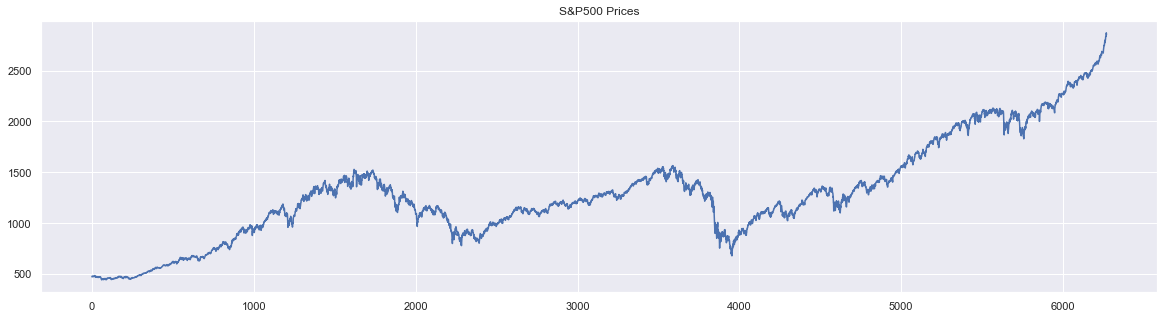

In [8]:
df_comp.spx.plot(figsize = (20,5), title = "S&P500 Prices")

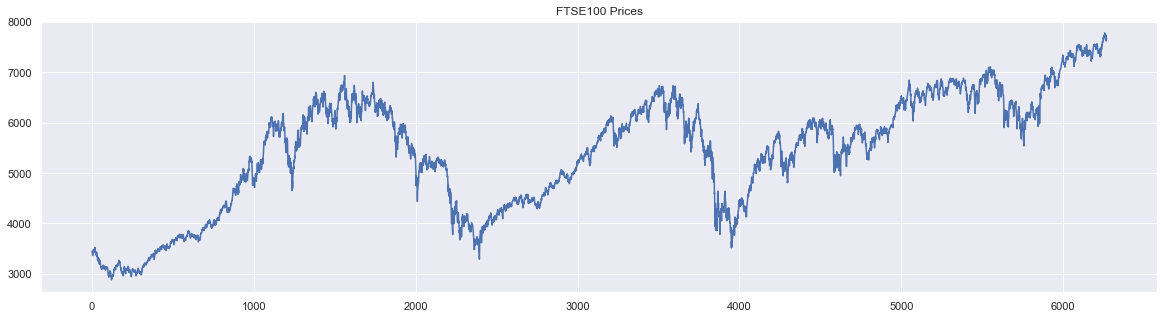

In [9]:
df_comp.ftse.plot(figsize = (20,5), title = "FTSE100 Prices")

Text(0.5, 1.0, 'SPX vs FTSE')

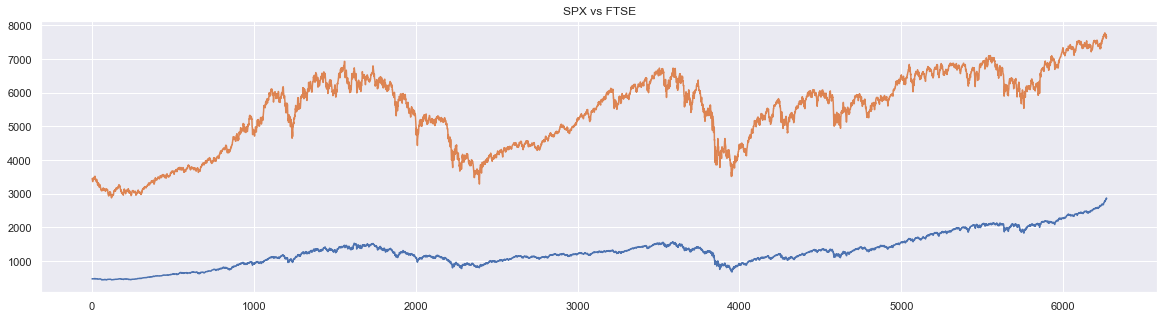

In [10]:
df_comp.spx.plot(figsize = (20,5), title = "S&P500 Prices")
df_comp.ftse.plot(figsize = (20,5), title = "FTSE100 Prices")
plt.title("SPX vs FTSE")

#### Note: The SPX curve is actually not flat but in the plot above it's compounded

## QQ Plot

In [11]:
import scipy.stats
import pylab

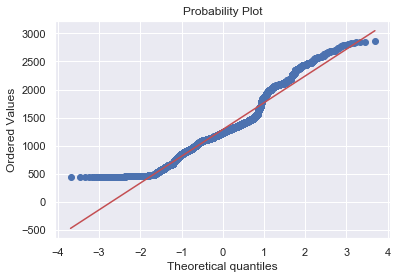

In [12]:
scipy.stats.probplot(df_comp.spx, plot = pylab)
pylab.show()

## Transforming String Inputs into Date Time Values

### Length of the Time Period

In [13]:
# Let's convert date data into a "date" type
df_comp.date.describe() # not very informative

count           6269
unique          6269
top       02/05/2008
freq               1
Name: date, dtype: object

In [14]:
# Coverting the date so we can get actual useful stats
df_comp.date = pd.to_datetime(df_comp.date, dayfirst = True) # default format in pandas is mm/dd/yyyy

In [15]:
df_comp.head()

,date,spx,dax,ftse,nikkei
0,1994-01-07,469.90,2224.95,3445.98,18124.01
1,1994-01-10,475.27,2225.00,3440.58,18443.44
2,1994-01-11,474.13,2228.10,3413.77,18485.25
3,1994-01-12,474.17,2182.06,3372.02,18793.88
4,1994-01-13,472.47,2142.37,3360.01,18577.26


In [16]:
 df_comp.date.describe() # More detailed stats after conversion

count                    6269
unique                   6269
top       1999-08-23 00:00:00
freq                        1
first     1994-01-07 00:00:00
last      2018-01-29 00:00:00
Name: date, dtype: object

## Setting the index

In [17]:
df_comp.set_index("date", inplace = True) # Date is now the index
# You can't manipulate or edit date values new as they became the index

In [18]:
df_comp.head()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25
1994-01-12,474.17,2182.06,3372.02,18793.88
1994-01-13,472.47,2142.37,3360.01,18577.26


### Setting the desired frequency

In [19]:
df_comp = df_comp.asfreq('d') # a for annual, d for daily, b = business days

In [20]:
df_comp.head() # NaN values start appearing

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-08,NaN,NaN,NaN,NaN
1994-01-09,NaN,NaN,NaN,NaN
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25


In [21]:
# Now let's remove any data recorded during holidays or non-working hours
df_comp = df_comp.asfreq('b') 

In [22]:
df_comp.head()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25
1994-01-12,474.17,2182.06,3372.02,18793.88
1994-01-13,472.47,2142.37,3360.01,18577.26


## Handling Missing Values

In [23]:
df_comp.isna()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,False,False,False,False
1994-01-10,False,False,False,False
1994-01-11,False,False,False,False
1994-01-12,False,False,False,False
1994-01-13,False,False,False,False
...,...,...,...,...
2018-01-23,False,False,False,False
2018-01-24,False,False,False,False
2018-01-25,False,False,False,False


In [24]:
df_comp.isna().sum()

spx       8
dax       8
ftse      8
nikkei    8
dtype: int64

In [25]:
df_comp.spx = df_comp.spx.fillna(method ="ffill")

In [26]:
df_comp.ftse = df_comp.ftse.fillna(method ="bfill")

In [27]:
df_comp.isna().sum()

spx       0
dax       8
ftse      0
nikkei    8
dtype: int64

In [28]:
df_comp.dax = df_comp.dax.fillna(value = df_comp.dax.mean())

In [29]:
df_comp.isna().sum()

spx       0
dax       0
ftse      0
nikkei    8
dtype: int64

In [30]:
df_comp.nikkei = df_comp.nikkei.fillna(method ="bfill")

### Simplifying the Data: Dropping Columns & Creating New Ones

In [31]:
df_comp["market_value"] = df_comp.spx

In [32]:
df_comp.describe()

,spx,dax,ftse,nikkei,market_value
count,6277.000000,6277.000000,6277.000000,6277.000000,6277.000000
mean,1288.642547,6080.063363,5423.690398,14597.597179,1288.642547
std,487.868210,2752.604984,1145.568370,4043.683038,487.868210
min,438.920000,1911.700000,2876.600000,7054.980000,438.920000
25%,992.715221,4070.460000,4487.880000,10701.130000,992.715221
50%,1233.761241,5774.380000,5663.300000,15030.510000,1233.761241
75%,1460.250000,7442.660000,6304.630175,17860.470000,1460.250000
max,2872.867839,13559.600000,7778.637689,24124.150000,2872.867839


In [33]:
del df_comp["spx"]

In [34]:
df_comp.describe()

,dax,ftse,nikkei,market_value
count,6277.000000,6277.000000,6277.000000,6277.000000
mean,6080.063363,5423.690398,14597.597179,1288.642547
std,2752.604984,1145.568370,4043.683038,487.868210
min,1911.700000,2876.600000,7054.980000,438.920000
25%,4070.460000,4487.880000,10701.130000,992.715221
50%,5774.380000,5663.300000,15030.510000,1233.761241
75%,7442.660000,6304.630175,17860.470000,1460.250000
max,13559.600000,7778.637689,24124.150000,2872.867839


In [35]:
del df_comp["dax"], df_comp["ftse"], df_comp["nikkei"]

In [36]:
df_comp.describe()

,market_value
count,6277.000000
mean,1288.642547
std,487.868210
min,438.920000
25%,992.715221
50%,1233.761241
75%,1460.250000
max,2872.867839


### Splitting Data

In [37]:
# Determing the cut-off point
size = int(len(df_comp*0.8))

In [38]:
df_train = df_comp.iloc[:size] 
df_test = df_comp.iloc[size:]

**Note:** We'll compare df.head() and df.tail() to make sure there are no overlapping values

In [39]:
df_train.head()

,market_value
date,
1994-01-07,469.90
1994-01-10,475.27
1994-01-11,474.13
1994-01-12,474.17
1994-01-13,472.47


In [40]:
df_train.tail()

,market_value
date,
2018-01-23,2839.130362
2018-01-24,2837.544008
2018-01-25,2839.253031
2018-01-26,2872.867839
2018-01-29,2853.528411


## Creating Time Series Objects

### White Noise

In [41]:
wn = np.random.normal(loc = df_train.market_value.mean(), scale = df_train.market_value.std(), size = len(df_train))

In [42]:
# Adding white noise to our data
df_train['wn'] = wn

C:\Users\Dina\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [43]:
df_train.describe()

,market_value,wn
count,6277.000000,6277.000000
mean,1288.642547,1283.305214
std,487.868210,485.247353
min,438.920000,-426.742488
25%,992.715221,948.751307
50%,1233.761241,1283.299963
75%,1460.250000,1611.113866
max,2872.867839,3182.537888


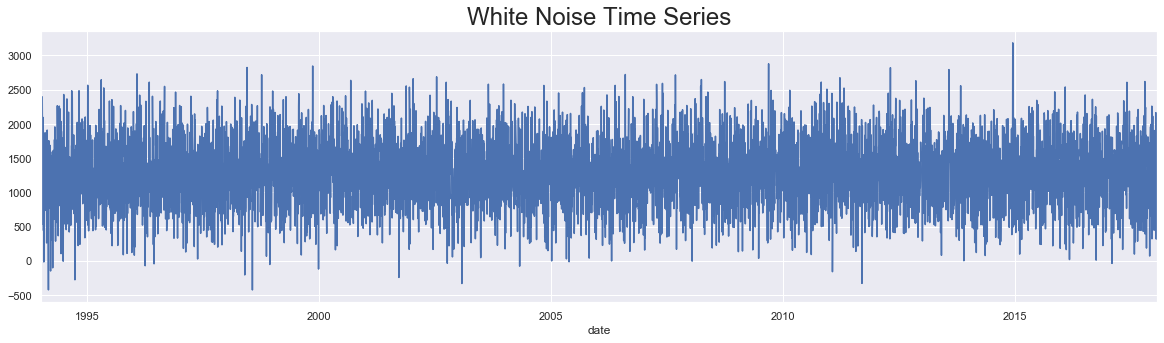

In [44]:
df_train.wn.plot(figsize = (20,5))
plt.title("White Noise Time Series", size = 24)
plt.show()

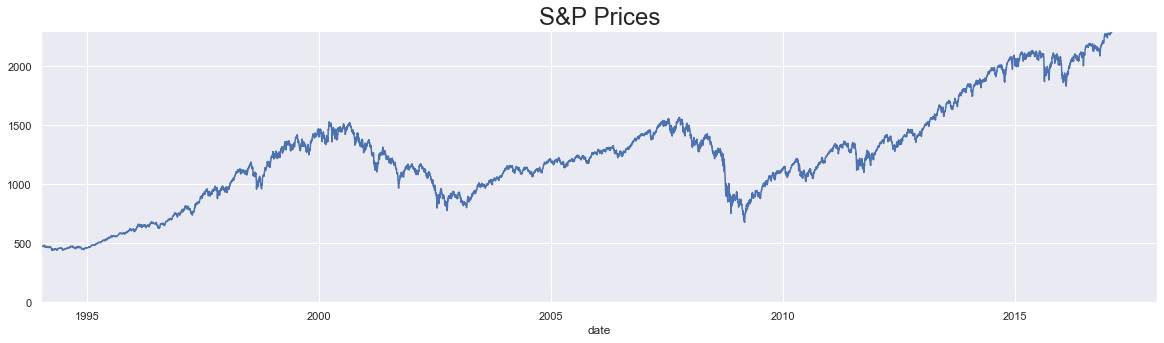

In [45]:
df_train.market_value.plot(figsize = (20,5))
plt.title("S&P Prices", size = 24)
plt.ylim(0,2300)
plt.show()

**Note:** It's easier to compare the two plots if they have the same range of values on the y-axis

### Random Walk

In [50]:
rw = pd.read_csv("RandWalk.csv")
rw.date = pd.to_datetime(rw.date, dayfirst = True)
rw.set_index("date", inplace = True)
rw = rw.asfreq('b')

In [51]:
rw.describe()

,price
count,5021.000000
mean,1269.944293
std,444.216793
min,585.483034
25%,931.550429
50%,1156.363045
75%,1488.362029
max,2715.508720


In [53]:
df_train['rw'] = rw.price

C:\Users\Dina\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [54]:
df_train.head()

,market_value,wn,rw
date,,,
1994-01-07,469.90,1683.586132,1122.139662
1994-01-10,475.27,1488.713016,1080.347860
1994-01-11,474.13,1881.960903,1082.095245
1994-01-12,474.17,1103.069351,1083.639265
1994-01-13,472.47,1557.680965,1067.146255


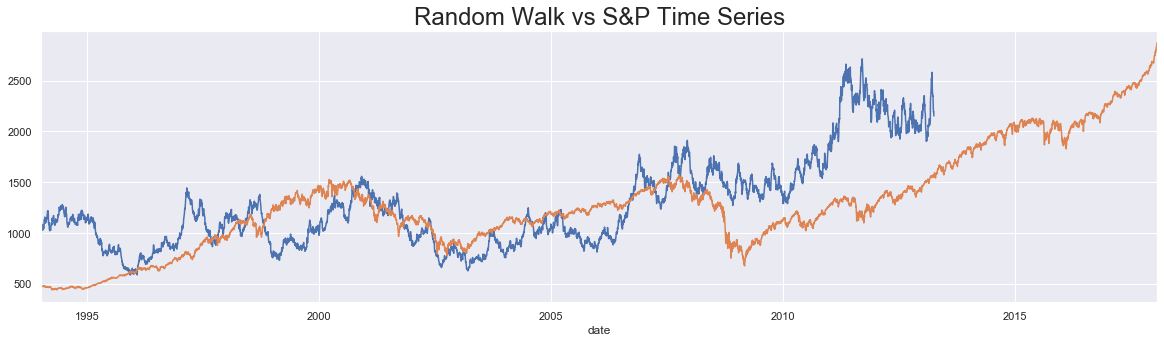

In [58]:
df_train.rw.plot(figsize = (20,5))
df_train.market_value.plot(figsize = (20,5))
plt.title("Random Walk vs S&P Time Series", size = 24)
plt.show()